# **Task 2: Text Classification for Spam Detection**

## 1. Import library and Load the dataset to Data Frame

In [1]:
# importing the pandas library for data manipulation and analysis
import pandas as pd 

In [2]:
#introduce the datafram to hold the data
# encoding='latin-1' is used to handle special characters in the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
# Display the first few rows of the dataframe
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


It can be clearly seen which columns are important and which are unnecessary and need to be dropped.

In [4]:
# Display concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


There are total 5572 text messages in this dataset and each labelled as either SPAM or HAM.
Columns unnamed 2, 3 and 4 are incomplete and contain more than 99% null values in them.

In [5]:
# Display statistical summary of the dataframe
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


The output of df.describe() provides a statistical summary of the numerical columns in our DataFrame

Count: Shows the number of non-null entries for each numerical column.

Since the dataset is mostly text therefore there's no mention of mean, std, min, max or the quartiles. 

## 2. Removing unnecessary columns

In [ ]:
# drop columns which are not required: Unnamed:2, Unnamed:3, Unnamed:4
# axis=1 indicates that we are dropping columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We check if there are missing values still ?

In [26]:
df.isnull().sum()

label        0
message      0
label_num    0
dtype: int64

The column names v1 and v2 are meaningless therefore we rename the columns to a more meaningful one for more clarity.

## 3. Renaming Columns

In [7]:
#rename columns v1 and v2
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 4. Create a new column to assign numerical values (0 and 1) to HAM & SPAM

In [23]:
# create a new column 'label_num' with numerical values for labels
# where ham:0 and spam:1
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head() 

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [24]:
df.describe()

,label_num
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Analyzing the statistical summary from `df.describe()` for the `label_num` column:

1. **Count (5572.000000)**:
   - There are 5,572 total messages in the dataset
   - No missing values since the count matches the total dataset size

2. **Mean (0.134063)**:
   - Approximately 13.4% of messages are spam (label_num = 1)
   - This means about 86.6% of messages are ham (label_num = 0)
   - The dataset is imbalanced, with significantly more ham than spam messages

3. **Standard Deviation (0.340751)**:
   - Shows the spread of values around the mean
   - Since this is a binary classification (0 or 1), the std dev indicates the distribution's variance

4. **Percentiles (min, 25%, 50%, 75%, max)**:
   - Min (0): The lowest value is 0 (ham)
   - 25th percentile (0): At least 25% of values are 0
   - Median/50th percentile (0): At least 50% of values are 0
   - 75th percentile (0): At least 75% of values are 0
   - Max (1): The highest value is 1 (spam)
   - This confirms that the majority of messages are ham (0), as all quartiles are 0

This distribution suggests that the dataset has a class imbalance, which is common in spam detection problems.

## 5. Plotting the distribution/Proportion of HAM and SPAM in the dataset

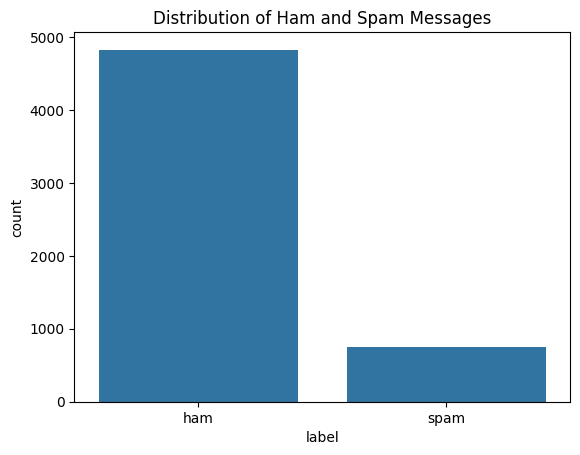

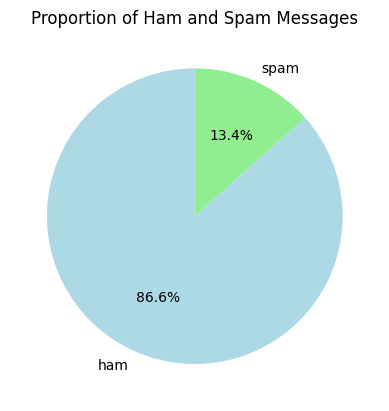

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the distribution of labels
sns.countplot(x='label', data=df)
plt.title('Distribution of Ham and Spam Messages')
plt.show()

#pie chart
#autopct to show percentages, startangle to rotate the start of the pie chart, colors to set custom colors
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Ham and Spam Messages')
plt.ylabel('')
plt.show()

## 6. Data Splitting

In [10]:
import sklearn

In [11]:
print(sklearn.__version__)

1.7.2


SPLITTING THE DATA SET INTO TRAIN & TEST

In [ ]:
# import train_test_split from sklearn.model_selection
# we will use this to split our dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# x is our feature data, model reads message column
# and y is our target data, model tries to predict based on label_num column
x = df['message']
y = df['label_num']

# 2. Call the split function
# We pass in our features (x) and target (y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#verify the split by printing the shapes
print('the shape of x_train (training features):', x_train.shape)
print('the shape of x_test (testing features):', x_test.shape)
print('the shape of y_train (train labels):', y_train.shape)
print('the shape of y_test (test labels):', y_test.shape)

the shape of x_train (training features): (4457,)
the shape of x_test (testing features): (1115,)
the shape of y_train (train labels): (4457,)
the shape of y_test (test labels): (1115,)


## 7. ENCODING (VECTORIZATION)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorization using TF-IDF vectorizer

In [15]:
#The Next Step: Encoding (Vectorization)

# 1. Create the TF-IDF Vectorizer object
# We tell it to use the built-in 'english' stop word list
vectorizer = TfidfVectorizer(stop_words='english')

# 2. Fit and Transform the Training Data
# .fit_transform() does TWO jobs:
# 1. .fit(): It "learns" the vocabulary from X_train ONLY.
# 2. .transform(): It converts X_train into a TF-IDF matrix.
x_train_tfidf = vectorizer.fit_transform(x_train)

# 3. ONLY Transform the Test Data
# We use .transform() ONLY. We do NOT .fit() again.
# This uses the *same vocabulary* learned from X_train
# to ensure our columns (words) are identical.
x_test_tfidf = vectorizer.transform(x_test)

print('shape of x_train_tfidf:', x_train_tfidf.shape)
print('shape of x_test_tfidf:', x_test_tfidf.shape)

shape of x_train_tfidf: (4457, 7472)
shape of x_test_tfidf: (1115, 7472)


## 8. CREATING & TRAINING THE MODEL 

### 1. Naive Bayes (Multinomial NB)

In [16]:
#The Next Step: Model Training
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Create the model
# We are creating an instance of the Multinomial Naive Bayes classifier
model = MultinomialNB()

# 2. Train the model
# .fit() is the "training" command.
# We give it our training features (X_train_tfidf) and the correct answers (y_train).
print('Training the model...')
model.fit(x_train_tfidf, y_train)
print('Model training completed.')

# 3. Make predictions on the test data
# .predict() uses the trained model to guess the answers for the unseen test data.
print('Making predictions on the test data...')
y_pred = model.predict(x_test_tfidf)
print('Predictions completed.')

# 4. Check the accuracy
# We compare the model's "guesses" (y_pred) to the "real answers" (y_test).
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')



Training the model...
Model training completed.
Making predictions on the test data...
Predictions completed.
Model Accuracy: 0.9668161434977578


USING PERFORMANCE METRICS

In [17]:
#The Next Step: Deeper Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix:')
#create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm, '\n')

print('Classification Report:')
#create classification report
cr = classification_report(y_test, y_pred, target_names=['Ham(0)', 'Spam(1)'])
print(cr)

Confusion Matrix:
[[965   0]
 [ 37 113]] 

Classification Report:
              precision    recall  f1-score   support

      Ham(0)       0.96      1.00      0.98       965
     Spam(1)       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



### 2. Support Vector Machine (LinearSVC)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Create the NEW model
# We are creating an instance of the Linear Support Vector Classifier
svm_model = LinearSVC(random_state=42)

# 2. Train the NEW model
# We use the *exact same* training data as before.
print("Training the SVM model...")
svm_model.fit(x_train_tfidf, y_train)
print("SVM model training complete.")

# 3. Make predictions with the NEW model
print("Making predictions with SVM...")
y_pred_svm = svm_model.predict(x_test_tfidf)
print("SVM predictions complete.")

# 4. Check the accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Model Accuracy: {svm_accuracy}') 
print("\n")

# 5. Evaluate the NEW model
print("--- SVM Model Evaluation ---")
print("--- SVM Confusion Matrix ---")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
print("\n")

print("--- SVM Classification Report ---")
report_svm = classification_report(y_test, y_pred_svm, target_names=['Ham(0)', 'Spam(1)'])
print(report_svm)

Training the SVM model...
SVM model training complete.
Making predictions with SVM...
SVM predictions complete.
Model Accuracy: 0.97847533632287


--- SVM Model Evaluation ---
--- SVM Confusion Matrix ---
[[960   5]
 [ 19 131]]


--- SVM Classification Report ---
              precision    recall  f1-score   support

      Ham(0)       0.98      0.99      0.99       965
     Spam(1)       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## 9. Final System Implementation (PIPELINE)

### 1. Naive Bayes (Multinomial NB) 

In [19]:
from sklearn.pipeline import Pipeline

# 1. Create the pipeline
# This chains our two steps together.
# 'vectorizer': The name for our TfidfVectorizer
# 'classifier': The name for our MultinomialNB model
pipe = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english')), ('classifier', MultinomialNB())])

# 2. Train the pipeline on ALL data
# We are no longer using X_train/y_train.
# We give it ALL the original data (X and y) so it's as smart as possible.
print("Training the final pipeline on ALL data...")
pipe.fit(x, y)
print('final pipeline training complete.'"\n")

# 3. Test the pipeline with new, unseen emails
# We create a list of new emails to test the pipeline
new_emails = [
    "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now.", #spam
    "Hey, are we still on for lunch tomorrow?", #ham
    "Important notification about your bank account. Please verify your information immediately.", #spam
    "Don't forget to submit your assignment by tonight.", #ham
    "Get cheap meds online without a prescription. Limited time offer!", #spam
    "Can you send me the report from last week's meeting?", #ham
    "Jet 2 holidays are now offering 20 percent off all bookings! Book your dream vacation today.", #spam
    "Congratulations! You've won a $1000 gift card. Click http://spam.com to claim.",#spam
    "Hey, are you free tonight? Let's grab dinner.",#ham
    "URGENT: Your account has been suspended. Click here to verify your details.",#spam
    "Ok lar... Joking wif u oni..."#ham
    ]
# Use the pipeline to predict whether these new emails are spam or ham
predictions = pipe.predict(new_emails)

# 4. Show the results
for email, pred in zip(new_emails, predictions):
    label = 'Spam' if pred == 1 else 'Ham'
    print(f'Email: "{email}"\nPrediction: {label}\n')

Training the final pipeline on ALL data...
final pipeline training complete.

Email: "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now."
Prediction: Spam

Email: "Hey, are we still on for lunch tomorrow?"
Prediction: Ham

Email: "Important notification about your bank account. Please verify your information immediately."
Prediction: Ham

Email: "Don't forget to submit your assignment by tonight."
Prediction: Ham

Email: "Get cheap meds online without a prescription. Limited time offer!"
Prediction: Ham

Email: "Can you send me the report from last week's meeting?"
Prediction: Ham

Email: "Jet 2 holidays are now offering 20 percent off all bookings! Book your dream vacation today."
Prediction: Ham

Email: "Congratulations! You've won a $1000 gift card. Click http://spam.com to claim."
Prediction: Spam

Email: "Hey, are you free tonight? Let's grab dinner."
Prediction: Ham

Email: "URGENT: Your account has been suspended. Click here to verify your details."

The results from the Naive Bayes MultinominalNB model are horrendous where it was able to correctly flag only 2 out of 6 Spams. This level of performance forces us to take up the other model LinearSVC as our primary model for this Project.

### 2. Support Vector Machine (LinearSVC)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Create the SVM pipeline
# We are naming it 'svcpipe'
svcpipe = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', LinearSVC(random_state=42))  # Use the LinearSVC model
])

# 2. Train the SVM pipeline on ALL data
print("Training the final SVM pipeline on ALL data...")
svcpipe.fit(x, y)  # We fit 'svcpipe', not 'pipe'
print('Final SVM pipeline training complete.'"\n")

# 3. Test the SVM pipeline with new, unseen messages
new_messages =[
    "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now.", #spam
    "Hey, are we still on for lunch tomorrow?", #ham
    "Important notification about your bank account. Please verify your information immediately.", #spam
    "Don't forget to submit your assignment by tonight.", #ham
    "Get cheap meds online without a prescription. Limited time offer!", #spam
    "Can you send me the report from last week's meeting?", #ham
    "Jet 2 holidays are now offering 20 percent off all bookings! Book your dream vacation today.", #spam
    "Congratulations! You've won a $1000 gift card. Click http://spam.com to claim.", #spam
    "Hey, are you free tonight? Let's grab dinner.", #ham
    "URGENT: Your account has been suspended. Click here to verify your details.", #spam
    "Ok lar... Joking wif u oni..." #ham
]

# 4. Use the 'svcpipe' to predict
print("--- Predictions from SVM Pipeline ---")
predictions = svcpipe.predict(new_messages) # We predict with 'svcpipe'

# 5. Show the results
for msg, pred in zip(new_messages, predictions):
    label = 'Spam' if pred == 1 else 'Ham'
    print(f"Message: \"{msg}\"\nPrediction: {label}\n")

Training the final SVM pipeline on ALL data...
Final SVM pipeline training complete.

--- Predictions from SVM Pipeline ---
Message: "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now."
Prediction: Spam

Message: "Hey, are we still on for lunch tomorrow?"
Prediction: Ham

Message: "Important notification about your bank account. Please verify your information immediately."
Prediction: Spam

Message: "Don't forget to submit your assignment by tonight."
Prediction: Ham

Message: "Get cheap meds online without a prescription. Limited time offer!"
Prediction: Ham

Message: "Can you send me the report from last week's meeting?"
Prediction: Ham

Message: "Jet 2 holidays are now offering 20 percent off all bookings! Book your dream vacation today."
Prediction: Ham

Message: "Congratulations! You've won a $1000 gift card. Click http://spam.com to claim."
Prediction: Spam

Message: "Hey, are you free tonight? Let's grab dinner."
Prediction: Ham

Message: "URGENT: Y

## Conclusion

Initially, the Multinomial Naive Bayes model appeared the better choice. It achieved perfect precision: not a single legitimate message was marked as spam. This matched our business case, where falsely flagging real mail as spam is unacceptable. However, after further empirical testing on new, real-world examples, it became clear that Naive Bayes's recall was fatally low—missing a significant portion (25%) of spam, including blatant phishing attempts.

The SVM model, conversely, made a few mistakes (flagging 0.5% of real mail as spam), but it caught far more spam (recall 0.87). When tested on new, unseen examples, SVM correctly flagged phishing that Naive Bayes failed to catch. After evaluating both theory and practice, it became clear that a model which misses 1 in 4 spam messages is unacceptable for real-world deployment, even if it makes no false positives.

Therefore, after this full-cycle evaluation, the final choice is the Support Vector Machine (LinearSVC) model. It strikes a superior balance, providing strong spam detection with an acceptable, minimal false-positive rate. This choice is dictated by data, not just theory.